In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

In [2]:
training_inputs = np.array([
     [0.8, 0.1],
    [0.7, 0.2],
    [0.9, 0.3],
    [0.3, 0.8],
    [0.1, 0.7],
    [0.1,0.9]
])
labels = np.array([-1,-1,-1,1,1,1])
colors = ['red', 'blue']

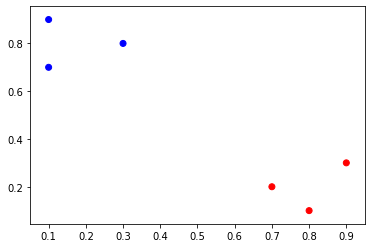

In [4]:
plt.scatter(training_inputs[:,0],training_inputs[:,1],c=labels,cmap =matplotlib.colors.ListedColormap(colors))

In [23]:
#initialize weights
d = np.shape(training_inputs)[1]
w = np.zeros(d)

#Algorithm
while(any([element <= 0 for element in [labels[ind]*np.dot(w,x) for ind,x in enumerate(training_inputs)] ])):    
     print("not converged yet!")
     mistakes = np.where([element<=0 for element in [labels[ind]*np.dot(w,x) for ind,x in enumerate(training_inputs)] ])[0]
     misclass = np.min(mistakes)
     w = w + labels[misclass]*training_inputs[misclass]         
     print(w)
print("converged!")

not converged yet!
[-0.8 -0.1]
not converged yet!
[-0.5  0.7]
converged!


array([0.        , 0.01457726, 0.02915452, 0.04373178, 0.05830904,
       0.0728863 , 0.08746356, 0.10204082, 0.11661808, 0.13119534,
       0.14577259, 0.16034985, 0.17492711, 0.18950437, 0.20408163,
       0.21865889, 0.23323615, 0.24781341, 0.26239067, 0.27696793,
       0.29154519, 0.30612245, 0.32069971, 0.33527697, 0.34985423,
       0.36443149, 0.37900875, 0.39358601, 0.40816327, 0.42274052,
       0.43731778, 0.45189504, 0.4664723 , 0.48104956, 0.49562682,
       0.51020408, 0.52478134, 0.5393586 , 0.55393586, 0.56851312,
       0.58309038, 0.59766764, 0.6122449 , 0.62682216, 0.64139942,
       0.65597668, 0.67055394, 0.6851312 , 0.69970845, 0.71428571])

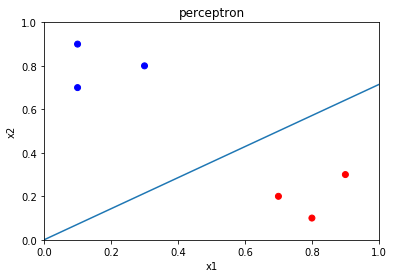

In [28]:
#plot the seperator
a = -w[0] / w[1]
xx = np.linspace(0, 1)
yy = a * xx - (0) / w[1] 
plt.plot(xx,yy)
plt.scatter(training_inputs[:,0],training_inputs[:,1],c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("perceptron")
plt.xlabel("x1")
plt.ylabel("x2")
yy

In [29]:
#add new point[0.4,0.4] with label -1 to training_inputs and consider bias term also
training_inputs =  np.vstack((training_inputs, [0.4,0.4]))
labels = np.append(labels, -1)
training_inputs_ext = np.hstack((training_inputs,np.ones((np.shape(training_inputs)[0],1))))
d = np.shape(training_inputs_ext)[1]
w = np.zeros(d)
training_inputs_ext

array([[0.8, 0.1, 1. ],
       [0.7, 0.2, 1. ],
       [0.9, 0.3, 1. ],
       [0.3, 0.8, 1. ],
       [0.1, 0.7, 1. ],
       [0.1, 0.9, 1. ],
       [0.4, 0.4, 1. ]])

In [30]:
while(any([element<=0 for element in [labels[ind]*np.dot(w,x) for ind,x in enumerate(training_inputs_ext)] ])):    
     print("not converged yet!")
     mistakes = np.where([element<=0 for element in [labels[ind]*np.dot(w,x) for ind,x in enumerate(training_inputs_ext)] ])[0]
     misclass = np.min(mistakes)
     w = w + labels[misclass]*training_inputs_ext[misclass]
     print(w)
     pred_labels = [1 if x>0 else -1 for x in [np.dot(w,x) for x in training_inputs_ext]]
     tp = np.sum(np.logical_and(np.asarray(pred_labels) == 1, np.asarray(labels) == 1))
     print("number of true positives: ",tp)
print("converged!")

not converged yet!
[-0.8 -0.1 -1. ]
number of true positives:  0
not converged yet!
[-0.5  0.7  0. ]
number of true positives:  3
not converged yet!
[-0.9  0.3 -1. ]
number of true positives:  0
not converged yet!
[-0.6  1.1  0. ]
number of true positives:  3
not converged yet!
[-1.   0.7 -1. ]
number of true positives:  0
not converged yet!
[-0.7  1.5  0. ]
number of true positives:  3
not converged yet!
[-1.1  1.1 -1. ]
number of true positives:  0
not converged yet!
[-0.8  1.9  0. ]
number of true positives:  3
not converged yet!
[-1.2  1.5 -1. ]
number of true positives:  1
not converged yet!
[-0.9  2.3  0. ]
number of true positives:  3
not converged yet!
[-1.3  1.9 -1. ]
number of true positives:  3
converged!


Text(0, 0.5, 'x2')

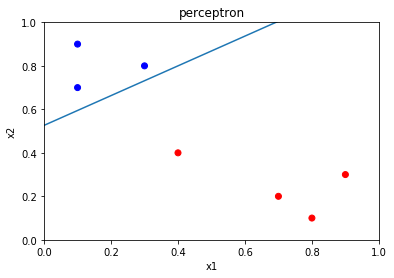

In [31]:

a = -w[0] / w[1]
xx = np.linspace(0, 1)
yy = a * xx - (w[2]) / w[1] 
plt.plot(xx,yy)
plt.scatter(training_inputs_ext[:,0],training_inputs_ext[:,1],c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("perceptron")
plt.xlabel("x1")
plt.ylabel("x2")